# Module 11: Save Tokens with Emotions

* Grace Lyons
* kat3ac

Use the NRC lexicon to explore sentiment in two novels. 

## Set Up

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

data_dir = '/content/drive/My Drive/DS_5001/MOD11/'

Mounted at /content/drive


### Import

In [2]:
import pandas as pd

### Configure

In [3]:
tokens = data_dir + 'TOKEN2.csv'
library = data_dir + 'LIB.csv'

mobydick = ('melvill', 'Moby Dick; or The Whale')
persuasion = ('austen', 'Persuasion')

salex_csv = data_dir + 'salex_nrc.csv'
nrc_cols = 'nrc_negative nrc_positive nrc_anger nrc_anticipation nrc_disgust nrc_fear nrc_joy nrc_sadness nrc_surprise nrc_trust'.split()
emo = 'polarity'

OHCO = ['author', 'title', 'chap_id', 'para_num', 'sent_num']

In [4]:
TOKENS = pd.read_csv(tokens)
LIB = pd.read_csv(library)

In [5]:
TOKENS.head()

,book_id,chap_id,para_num,sent_num,token_num,pos_tuple,pos,token_str,term_str,term_id
0,158,1,1,0,0,"('Emma', 'NNP')",NNP,Emma,emma,11614
1,158,1,1,0,1,"('Woodhouse', 'NNP')",NNP,Woodhouse,woodhouse,39340
2,158,1,1,0,3,"('handsome', 'NN')",NN,handsome,handsome,15924
3,158,1,1,0,5,"('clever', 'NN')",NN,clever,clever,6354
4,158,1,1,0,7,"('and', 'CC')",CC,and,and,1426


In [6]:
LIB.head()

,book_id,book_title,book_file,author,title
0,158,"Emma, by Jane Austen",epubs/AUSTEN_JANE_EMMA-pg158.txt,austen,Emma
1,946,"Lady Susan, by Jane Austen",epubs/AUSTEN_JANE_LADY_SUSAN-pg946.txt,austen,Lady Susan
2,1212,"Love And Freindship And Other Early Works, by ...",epubs/AUSTEN_JANE_LOVE_AND_FREINDSHIP_SIC_-pg1...,austen,Love And Freindship And Other Early Works
3,141,"Mansfield Park, by Jane Austen",epubs/AUSTEN_JANE_MANSFIELD_PARK-pg141.txt,austen,Mansfield Park
4,121,"Northanger Abbey, by Jane Austen",epubs/AUSTEN_JANE_NORTHANGER_ABBEY-pg121.txt,austen,Northanger Abbey


In [7]:
TOKENS = pd.merge(TOKENS, LIB, on = ['book_id']).set_index(OHCO).sort_index()

In [8]:
TOKENS.head()

book_id  token_num  \
author title chap_id para_num sent_num                       
austen Emma  1       1        0             158          0   
                              0             158          1   
                              0             158          3   
                              0             158          5   
                              0             158          7   

                                                   pos_tuple  pos  token_str  \
author title chap_id para_num sent_num                                         
austen Emma  1       1        0              ('Emma', 'NNP')  NNP       Emma   
                              0         ('Woodhouse', 'NNP')  NNP  Woodhouse   
                              0           ('handsome', 'NN')   NN   handsome   
                              0             ('clever', 'NN')   NN     clever   
                              0                ('and', 'CC')   CC        and   

                                         term_str  term_id  \
author title chap_id para_num sent_num                       
austen Emma  1       1        0              emma    11614   
                              0         woodhouse    39340   
                              0          handsome    15924   
                              0            clever     6354   
                              0               and     1426   

                                                  book_title  \
author title chap_id para_num sent_num                         
austen Emma  1       1        0         Emma, by Jane Austen   
                              0         Emma, by Jane Austen   
                              0         Emma, by Jane Austen   
                              0         Emma, by Jane Austen   
                              0         Emma, by Jane Austen   

                                                               book_file  
author title chap_id para_num sent_num                                    
austen Emma  1       1        0         epubs/AUSTEN_JANE_EMMA-pg158.txt  
                              0         epubs/AUSTEN_JANE_EMMA-pg158.txt  
                              0         epubs/AUSTEN_JANE_EMMA-pg158.txt  
                              0         epubs/AUSTEN_JANE_EMMA-pg158.txt  
                              0         epubs/AUSTEN_JANE_EMMA-pg158.txt

In [9]:
TOKENS = TOKENS.drop(['book_title', 'book_file', 'book_id'], axis = 1)
TOKENS.head()

token_num             pos_tuple  pos  \
author title chap_id para_num sent_num                                         
austen Emma  1       1        0                 0       ('Emma', 'NNP')  NNP   
                              0                 1  ('Woodhouse', 'NNP')  NNP   
                              0                 3    ('handsome', 'NN')   NN   
                              0                 5      ('clever', 'NN')   NN   
                              0                 7         ('and', 'CC')   CC   

                                        token_str   term_str  term_id  
author title chap_id para_num sent_num                                 
austen Emma  1       1        0              Emma       emma    11614  
                              0         Woodhouse  woodhouse    39340  
                              0          handsome   handsome    15924  
                              0            clever     clever     6354  
                              0               and        and     1426

### Get Lexicon

In [10]:
salex = pd.read_csv(salex_csv).set_index('term_str')
salex.columns = [col.replace('nrc_', '') for col in salex.columns]

In [11]:
salex['polarity'] = salex.positive - salex.negative 

#### Get lexicon columns

In [12]:
emo_cols = 'anger anticipation disgust fear joy sadness surprise trust polarity'.split()

In [13]:
emo_cols

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust',
 'polarity']

## Get Novels

In [14]:
TOKENS = TOKENS.join(salex, on = 'term_str', how = 'left')
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [15]:
TOKENS[salex.columns].sample(10)

anger  \
author   title                                     chap_id para_num sent_num          
melville White Jacket                              33      2        0           0.0   
         The Apple - Tree Table and Other Sketches 4       118      1           0.0   
austen   Sense and Sensibility                     34      9        0           0.0   
melville Pierre; or The Ambiguities                11      24       1           0.0   
                                                   91      1        4           0.0   
austen   Mansfield Park                            9       35       0           0.0   
melville Redburn. His First Voyage                 16      13       1           0.0   
         The Apple - Tree Table and Other Sketches 4       39       0           0.0   
         The Confidence - Man                      19      61       1           1.0   
austen   Sense and Sensibility                     41      38       1           0.0   

                                                                              anticipation  \
author   title                                     chap_id para_num sent_num                 
melville White Jacket                              33      2        0                  0.0   
         The Apple - Tree Table and Other Sketches 4       118      1                  0.0   
austen   Sense and Sensibility                     34      9        0                  0.0   
melville Pierre; or The Ambiguities                11      24       1                  0.0   
                                                   91      1        4                  0.0   
austen   Mansfield Park                            9       35       0                  0.0   
melville Redburn. His First Voyage                 16      13       1                  0.0   
         The Apple - Tree Table and Other Sketches 4       39       0                  0.0   
         The Confidence - Man                      19      61       1                  0.0   
austen   Sense and Sensibility                     41      38       1                  0.0   

                                                                              disgust  \
author   title                                     chap_id para_num sent_num            
melville White Jacket                              33      2        0             0.0   
         The Apple - Tree Table and Other Sketches 4       118      1             0.0   
austen   Sense and Sensibility                     34      9        0             0.0   
melville Pierre; or The Ambiguities                11      24       1             0.0   
                                                   91      1        4             0.0   
austen   Mansfield Park                            9       35       0             0.0   
melville Redburn. His First Voyage                 16      13       1             0.0   
         The Apple - Tree Table and Other Sketches 4       39       0             0.0   
         The Confidence - Man                      19      61       1             1.0   
austen   Sense and Sensibility                     41      38       1             0.0   

                                                                              fear  \
author   title                                     chap_id para_num sent_num         
melville White Jacket                              33      2        0          0.0   
         The Apple - Tree Table and Other Sketches 4       118      1          0.0   
austen   Sense and Sensibility                     34      9        0          0.0   
melville Pierre; or The Ambiguities                11      24       1          0.0   
                                                   91      1        4          0.0   
austen   Mansfield Park                            9       35       0          0.0   
melville Redburn. His First Voyage                 16      13       1          0.0   
         The Apple - Tree Table and Other Sketches 4       39

In [16]:
TOKENS[['term_str'] + emo_cols].sample(10)

term_str  anger  \
author   title                   chap_id para_num sent_num                     
austen   Lady Susan              7       3        1              girl    0.0   
melville The Confidence - Man    1       4        0         versatile    0.0   
         Israel Potter           19      36       5           forbear    0.0   
austen   Emma                    6       19       1                of    0.0   
melville Moby Dick; or The Whale 39      22       0                 a    0.0   
austen   Emma                    15      33       0                it    0.0   
melville Moby Dick; or The Whale 32      10       37             only    0.0   
austen   Sense and Sensibility   12      13       2              back    0.0   
         Mansfield Park          18      1        1            speech    0.0   
melville The Piazza Tales        1       286      0               cup    0.0   

                                                            anticipation  \
author   title                   chap_id para_num sent_num                 
austen   Lady Susan              7       3        1                  0.0   
melville The Confidence - Man    1       4        0                  0.0   
         Israel Potter           19      36       5                  0.0   
austen   Emma                    6       19       1                  0.0   
melville Moby Dick; or The Whale 39      22       0                  0.0   
austen   Emma                    15      33       0                  0.0   
melville Moby Dick; or The Whale 32      10       37                 0.0   
austen   Sense and Sensibility   12      13       2                  0.0   
         Mansfield Park          18      1        1                  0.0   
melville The Piazza Tales        1       286      0                  0.0   

                                                            disgust  fear  \
author   title                   chap_id para_num sent_num                  
austen   Lady Susan              7       3        1             0.0   0.0   
melville The Confidence - Man    1       4        0             0.0   0.0   
         Israel Potter           19      36       5             0.0   0.0   
austen   Emma                    6       19       1             0.0   0.0   
melville Moby Dick; or The Whale 39      22       0             0.0   0.0   
austen   Emma                    15      33       0             0.0   0.0   
melville Moby Dick; or The Whale 32      10       37            0.0   0.0   
austen   Sense and Sensibility   12      13       2             0.0   0.0   
         Mansfield Park          18      1        1             0.0   0.0   
melville The Piazza Tales        1       286      0             0.0   0.0   

                                                            joy  sadness  \
author   title                   chap_id para_num sent_num                 
austen   Lady Susan              7       3        1         0.0      0.0   
melville The Confidence - Man    1       4        0         0.0      0.0   
         Israel Potter           19      36       5         0.0      0.0   
austen   Emma                    6       19       1         0.0      0.0   
melville Moby Dick; or The Whale 39      22       0         0.0      0.0   
austen   Emma                    15      33       0         0.0      0.0   
melville Moby Dick; or The Whale 32      10       37        0.0      0.0   
austen   Sense and Sensibility   12      13       2         0.0      0.0   
         Mansfield Park          18      1        1         0.0      0.0   
melville The Piazza Tales        1       286      0         0.0      0.0   

                                                            surprise  trust  \
author   title                   chap_id para_num sent_num                    
austen   Lady Susan              7       3        1              0.0    0.0   
melville The Confidence - Man    1       4        0              0.0    0.0   
         Israel Potter           

In [17]:
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [18]:
TOKENS.head()

token_num             pos_tuple  pos  \
author title chap_id para_num sent_num                                         
austen Emma  1       1        0                 0       ('Emma', 'NNP')  NNP   
                              0                 1  ('Woodhouse', 'NNP')  NNP   
                              0                 3    ('handsome', 'NN')   NN   
                              0                 5      ('clever', 'NN')   NN   
                              0                 7         ('and', 'CC')   CC   

                                        token_str   term_str  term_id  anger  \
author title chap_id para_num sent_num                                         
austen Emma  1       1        0              Emma       emma    11614    0.0   
                              0         Woodhouse  woodhouse    39340    0.0   
                              0          handsome   handsome    15924    0.0   
                              0            clever     clever     6354    0.0   
                              0               and        and     1426    0.0   

                                        anticipation  disgust  fear  joy  \
author title chap_id para_num sent_num                                     
austen Emma  1       1        0                  0.0      0.0   0.0  0.0   
                              0                  0.0      0.0   0.0  0.0   
                              0                  0.0      0.0   0.0  0.0   
                              0                  0.0      0.0   0.0  0.0   
                              0                  0.0      0.0   0.0  0.0   

                                        negative  positive  sadness  surprise  \
author title chap_id para_num sent_num                                          
austen Emma  1       1        0              NaN       NaN      0.0       0.0   
                              0              NaN       NaN      0.0       0.0   
                              0              NaN       NaN      0.0       0.0   
                              0              NaN       NaN      0.0       0.0   
                              0              NaN       NaN      0.0       0.0   

                                        trust  polarity  
author title chap_id para_num sent_num                   
austen Emma  1       1        0           0.0       0.0  
                              0           0.0       0.0  
                              0           0.0       0.0  
                              0           0.0       0.0  
                              0           0.0       0.0

## Save

In [19]:
TOKENS.to_csv(data_dir + 'novels-with-sent.csv')

# Module 11: Sentiment and Plot in Novels

Use the NRC lexicon to explore sentiment in two novels.

## Set Up

### Configure

In [20]:
novels_csv = data_dir + 'novels-with-sent.csv'
OHCO = ['title', 'chap_id', 'para_num', 'sent_num']
emo = 'polarity'

### Import

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
import scipy as sp
import scipy.fftpack as fftpack
from sklearn.neighbors import KernelDensity as KDE
from sklearn.preprocessing import scale

In [23]:
plt.style.use('fivethirtyeight')
%matplotlib inline

## Get Tokens

In [24]:
TOKENS = pd.read_csv(novels_csv).set_index(OHCO).sort_index()

In [25]:
TOKENS.head()

author  token_num             pos_tuple  pos  \
title chap_id para_num sent_num                                                 
Emma  1       1        0         austen          0       ('Emma', 'NNP')  NNP   
                       0         austen          1  ('Woodhouse', 'NNP')  NNP   
                       0         austen          3    ('handsome', 'NN')   NN   
                       0         austen          5      ('clever', 'NN')   NN   
                       0         austen          7         ('and', 'CC')   CC   

                                 token_str   term_str  term_id  anger  \
title chap_id para_num sent_num                                         
Emma  1       1        0              Emma       emma    11614    0.0   
                       0         Woodhouse  woodhouse    39340    0.0   
                       0          handsome   handsome    15924    0.0   
                       0            clever     clever     6354    0.0   
                       0               and        and     1426    0.0   

                                 anticipation  disgust  fear  joy  negative  \
title chap_id para_num sent_num                                               
Emma  1       1        0                  0.0      0.0   0.0  0.0       NaN   
                       0                  0.0      0.0   0.0  0.0       NaN   
                       0                  0.0      0.0   0.0  0.0       NaN   
                       0                  0.0      0.0   0.0  0.0       NaN   
                       0                  0.0      0.0   0.0  0.0       NaN   

                                 positive  sadness  surprise  trust  polarity  
title chap_id para_num sent_num                                                
Emma  1       1        0              NaN      0.0       0.0    0.0       0.0  
                       0              NaN      0.0       0.0    0.0       0.0  
                       0              NaN      0.0       0.0    0.0       0.0  
                       0              NaN      0.0       0.0    0.0       0.0  
                       0              NaN      0.0       0.0    0.0       0.0

## Get Novels

In [26]:
titles = {'Moby Dick; or The Whale', 'Persuasion'}

In [27]:
titles

{'Moby Dick; or The Whale', 'Persuasion'}

In [28]:
NOVELS = TOKENS.groupby(OHCO)[emo_cols].mean()

In [29]:
NOVELS.head()

anger  anticipation   disgust     fear  \
title chap_id para_num sent_num                                              
Emma  1       1        0         0.024390      0.048780  0.024390  0.02439   
              2        0         0.030303      0.030303  0.030303  0.00000   
                       1         0.000000      0.048780  0.000000  0.00000   
              3        0         0.000000      0.000000  0.000000  0.00000   
                       1         0.000000      0.000000  0.000000  0.00000   

                                      joy  sadness  surprise     trust  \
title chap_id para_num sent_num                                          
Emma  1       1        0         0.048780  0.02439   0.04878  0.048780   
              2        0         0.030303  0.00000   0.00000  0.030303   
                       1         0.097561  0.04878   0.00000  0.097561   
              3        0         0.037037  0.00000   0.00000  0.037037   
                       1         0.000000  0.00000   0.00000  0.000000   

                                 polarity  
title chap_id para_num sent_num            
Emma  1       1        0         0.024390  
              2        0         0.000000  
                       1         0.048780  
              3        0         0.037037  
                       1         0.000000

### Establish Functions

In [30]:
def get_dct_transform(raw_values, low_pass_size=5, x_reverse_len=100):
    
    if low_pass_size > len(raw_values):
        raise ValueError("low_pass_size must be less than or equal to the length of raw_values input vector")

    values_dct = fftpack.dct(raw_values, type = 2)
    keepers = values_dct[:low_pass_size]
    padded_keepers = list(keepers) + list(np.zeros(x_reverse_len - low_pass_size))

    dct_out = fftpack.idct(padded_keepers)
    return(dct_out)


In [31]:
def plot_novel(title, dct=True, low_pass_size=5, x_reverse_len=100, emo='polarity', item=1):

    global NOVELS, axes, plot_cfg
    
    X=NOVELS.loc[title, emo].values
    
    if dct:
        method = "DCT"
        X = get_dct_transform(X, low_pass_size=low_pass_size, x_reverse_len=x_reverse_len)
    else: 
        method = "FFT"
        X=get_transformed_values(X, low_pass_size = low_pass_size, x_reverse_len=x_reverse_len, padding_factor =1)
        
    plot_cfg['title'] = "{} ({})".format(title, method)
    pd.Series(X).plot(**plot_cfg, ax=axes[i]);

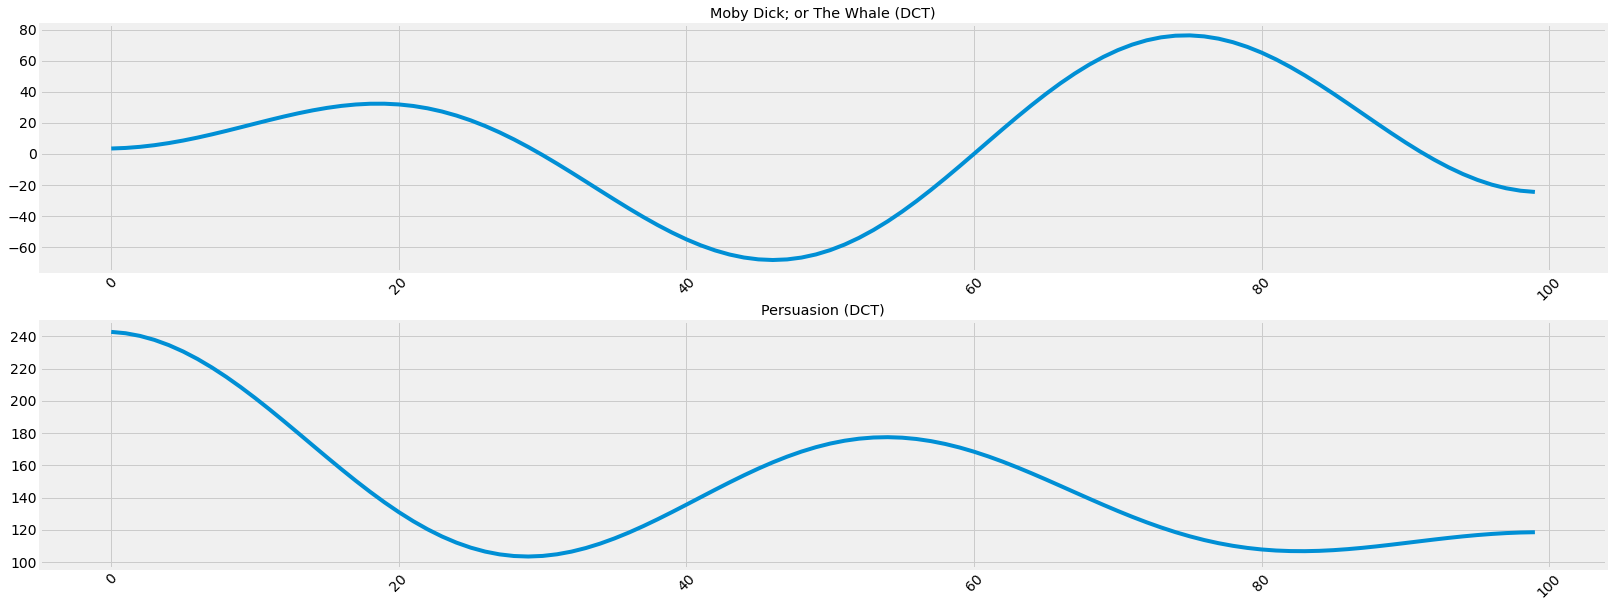

In [32]:
fig, axes = plt.subplots(len(titles), 1)
plot_cfg = dict(figsize=(25, 5*len(titles)),legend=False,fontsize=14,rot=45)
for i, title in enumerate(sorted(titles)):
    plot_novel(title, item=i)

First looking at the top plot, Moby Dick, it starts at about zero (neutral), then it goes very negative till about half way through the book and then is very positive. It finishes a little belowo zero. 

The bottom plot, Persuasion, starts very high. It has a large dip but is still much higher than Moby Dick ever gets. After a dip it goes up again but then ends low. 

In [33]:
PLOTS={}

In [34]:
def generate_emo_kde_plots(title, kde_kernel='gaussian', kde_bandwidth=100, kde_samples=1000):
    global NOVELS, PLOTS
    
    novel = NOVELS.loc[title].reset_index(drop=True)
    
    emo_offsets = []
    for col in emo_cols:
        x = novel[novel[col]>0].index.tolist()
        y = [[i] for i in x]
        emo_offsets.append((col, y))
    X = pd.DataFrame(emo_offsets, columns=['emo', 'x']).set_index('emo')
    
    scale_max =novel.shape[0]
    x_axis = np.linspace(0, scale_max, kde_samples)[:, np.newaxis]
    X['kde'] = X.apply(lambda row: KDE(kernel=kde_kernel, bandwidth=kde_bandwidth).fit(row.x), 1)
    X['scores'] = X.apply(lambda row: row.kde.score_samples(x_axis), axis=1)
    PLOTS[title] = X.apply(lambda row: pd.Series(np.exp(row.scores)* (scale_max/kde_samples)), axis=1).T
        

In [35]:
FIG = dict(figsize=(25, 5), legend=True, fontsize=20, rot=45)

In [36]:
generate_emo_kde_plots('Persuasion', kde_bandwidth = 100)
Persuasion = PLOTS['Persuasion']

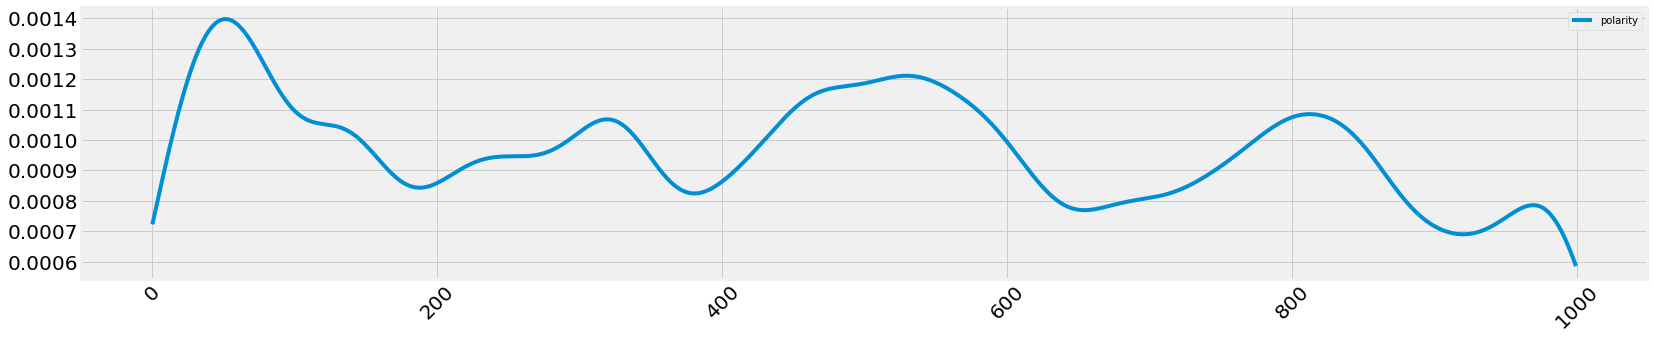

In [37]:
Persuasion['polarity'].plot(**FIG);

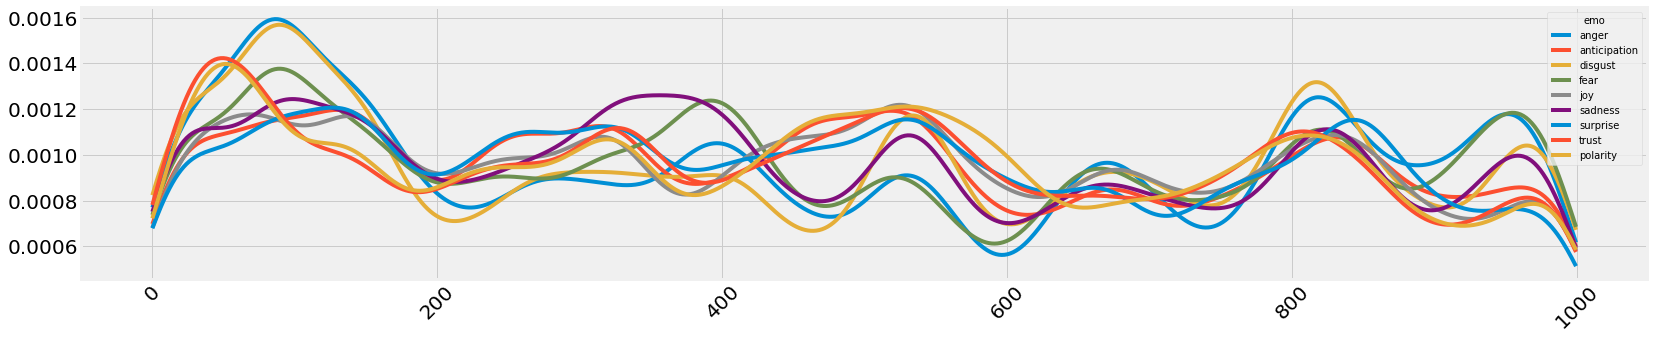

In [38]:
Persuasion.plot(**FIG);

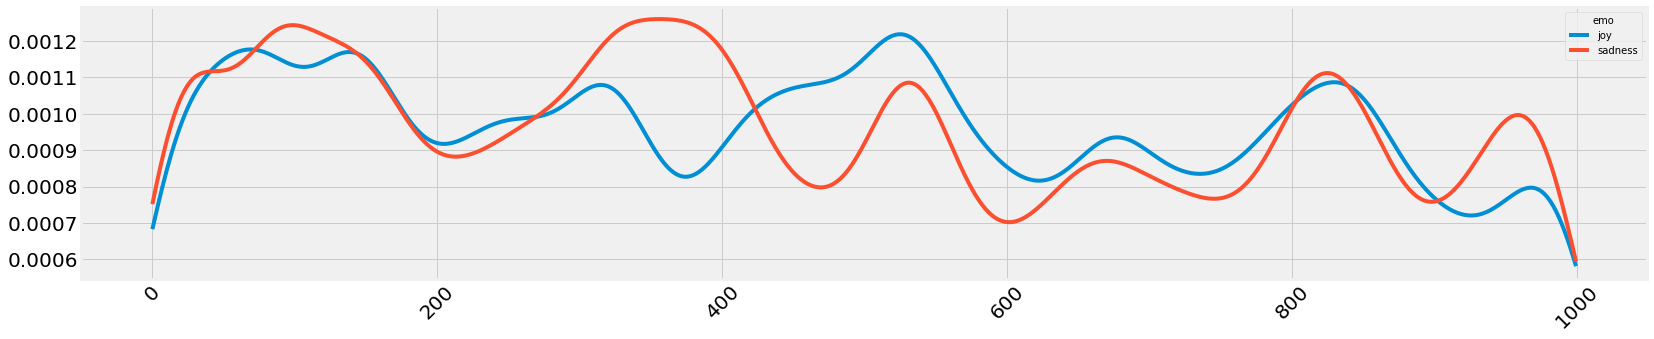

In [39]:
Persuasion[['joy', 'sadness']].plot(**FIG);

Surprisingly, for most of the novel, sadness and joy stay at about the same level. The main exception is a little before half way through when joy takes a major fall and sadness hits a peak. It then levels out about two thirds of the way through the book. The peak moment of joy is a little after half way through. 

In [40]:
generate_emo_kde_plots('Moby Dick; or The Whale', kde_bandwidth = 100)
Moby_Dick = PLOTS['Moby Dick; or The Whale']

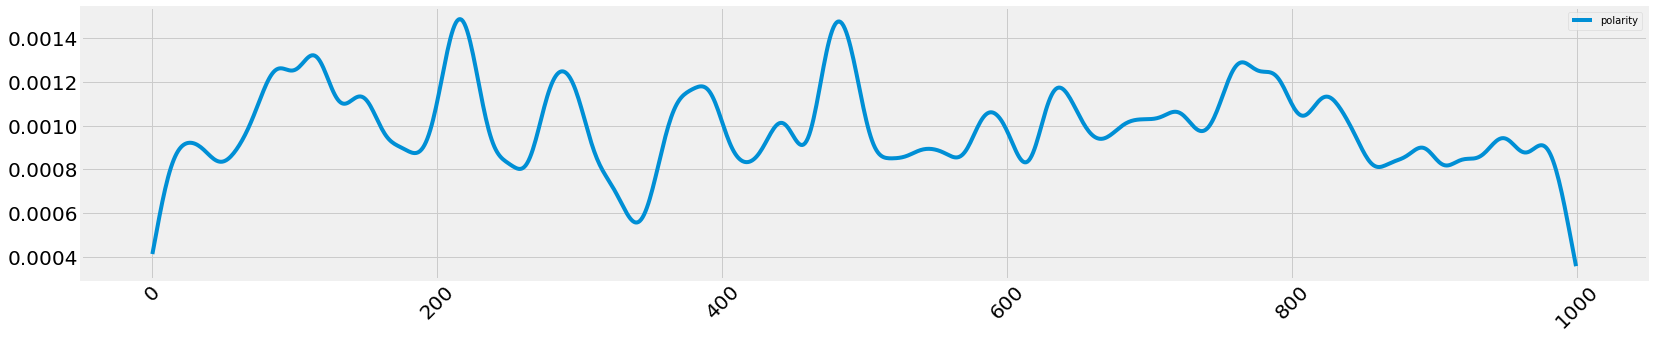

In [41]:
Moby_Dick['polarity'].plot(**FIG);

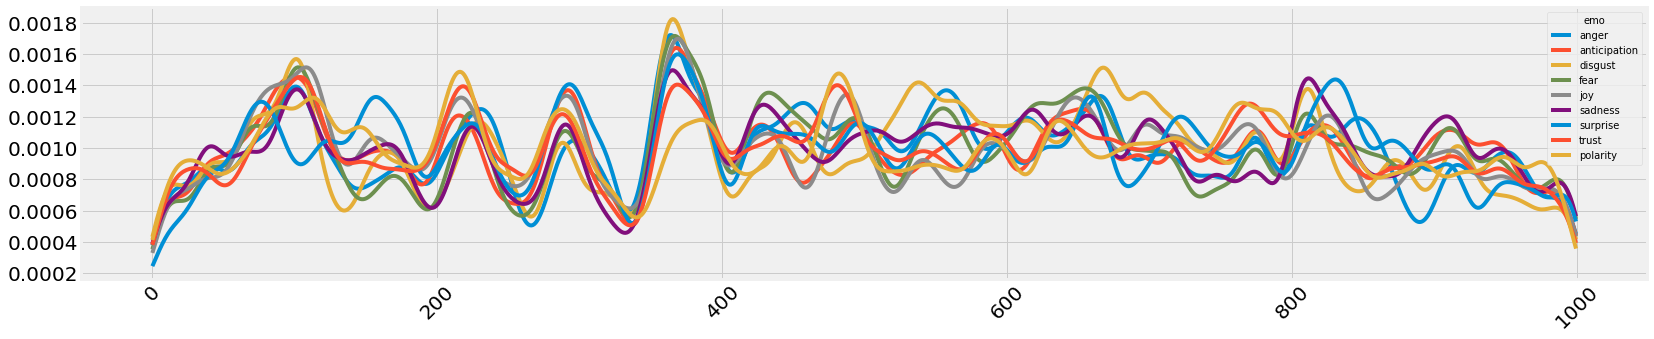

In [42]:
Moby_Dick.plot(**FIG);

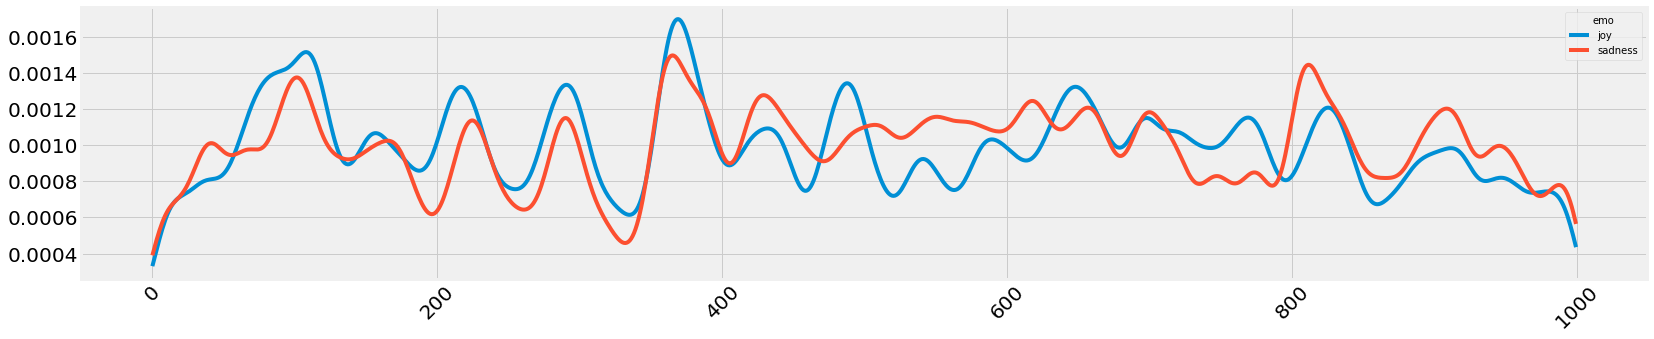

In [43]:
Moby_Dick[['joy', 'sadness']].plot(**FIG);

Similarly to Persuasion, with Moby Dick, joy and sadness stay about the same throughout the novle. It is interesting though because it seems throughout the novel, joy lags slightly behind sadness. 